# Assignment 7: Pandas Fundamentals with Earthquake Data

In this assignment, we will review pandas fundamentals, such as how to

- Open csv files
- Manipulate dataframe indexes
- Parse date columns
- Examine basic dataframe statistics
- Manipulate text columns and extract values
- Plot dataframe contents using
  - Bar charts
  - Histograms
  - Scatter plots

First, import Numpy, Pandas and Matplotlib and set the display options.

In [1]:
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.cm as cmap
from matplotlib import colors
import pandas as pd

Data for this assignment in .csv format downloaded from the [USGS Earthquakes Database](https://earthquake.usgs.gov/earthquakes/search/).  You can search for your own earthquake catalog there, and choose to download in a .csv file format. If you'd prefer to skip making your own earthquake catalog file, one you can use is available at:

http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv

Note: You don't need to download this file. You can open it directly with Pandas.

### 1) Use Pandas' read_csv function directly on this URL to open it as a DataFrame
(Don't use any special options). Display the first few rows and the DataFrame info.

In [2]:
url = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
data = pd.read_csv(url)
data #because a Pandas structure, it prints nicely without print()

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,id,updated,place,type
0,2014-01-31 23:53:37.000,60.252000,-152.708100,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,ak11155107,2014-02-05T19:34:41.515Z,"26km S of Redoubt Volcano, Alaska",earthquake
1,2014-01-31 23:48:35.452,37.070300,-115.130900,0.00,1.33,ml,4.0,171.43,0.342000,0.0247,nn,nn00436847,2014-02-01T01:35:09.000Z,"32km S of Alamo, Nevada",earthquake
2,2014-01-31 23:47:24.000,64.671700,-149.252800,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,ak11151142,2014-02-01T00:03:53.010Z,"12km NNW of North Nenana, Alaska",earthquake
3,2014-01-31 23:30:54.000,63.188700,-148.957500,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,ak11151135,2014-01-31T23:41:25.007Z,"22km S of Cantwell, Alaska",earthquake
4,2014-01-31 23:30:52.210,32.616833,-115.692500,10.59,1.34,ml,6.0,285.00,0.043210,0.2000,ci,ci37171541,2014-02-01T00:13:20.107Z,"10km WNW of Progreso, Mexico",earthquake
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
120103,2014-12-01 00:10:16.000,60.963900,-146.762900,14.80,3.80,ml,NaN,NaN,NaN,0.6900,ak,ak11453391,2015-03-24T18:25:07.628Z,"29km SW of Valdez, Alaska",earthquake
120104,2014-12-01 00:09:39.000,58.869100,-154.415900,108.40,2.40,ml,NaN,NaN,NaN,0.6700,ak,ak11453395,2014-12-10T01:04:25.209Z,"102km SSE of Old Iliamna, Alaska",earthquake
120105,2014-12-01 00:09:25.350,38.843498,-122.825836,2.37,0.43,md,8.0,107.00,0.008991,0.0300,nc,nc72358451,2014-12-01T01:15:02.814Z,"9km WNW of Cobb, California",earthquake
120106,2014-12-01 00:05:54.000,65.152100,-148.992000,9.50,0.40,ml,NaN,NaN,NaN,0.6900,ak,ak11453390,2014-12-10T01:03:01.225Z,"57km NW of Ester, Alaska",earthquake


In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 120108 entries, 0 to 120107
Data columns (total 15 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   time       120108 non-null  object 
 1   latitude   120108 non-null  float64
 2   longitude  120108 non-null  float64
 3   depth      120107 non-null  float64
 4   mag        120065 non-null  float64
 5   magType    120065 non-null  object 
 6   nst        59688 non-null   float64
 7   gap        94935 non-null   float64
 8   dmin       85682 non-null   float64
 9   rms        119716 non-null  float64
 10  net        120108 non-null  object 
 11  id         120108 non-null  object 
 12  updated    120108 non-null  object 
 13  place      120108 non-null  object 
 14  type       120108 non-null  object 
dtypes: float64(8), object(7)
memory usage: 13.7+ MB


You should have seen that the dates were not automatically parsed into datetime types.

### 2) Re-read the data in such a way that all date columns are identified as dates and the earthquake ID is used as the index

Verify that this worked using the `head` and `info` functions.


In [4]:
url = 'http://www.ldeo.columbia.edu/~rpa/usgs_earthquakes_2014.csv'
catalog = pd.read_csv(url, parse_dates=[0,12],)
catalog = catalog.set_index('id')

In [5]:
catalog.info()
catalog.head()

<class 'pandas.core.frame.DataFrame'>
Index: 120108 entries, ak11155107 to ak11453389
Data columns (total 14 columns):
 #   Column     Non-Null Count   Dtype              
---  ------     --------------   -----              
 0   time       120108 non-null  datetime64[ns]     
 1   latitude   120108 non-null  float64            
 2   longitude  120108 non-null  float64            
 3   depth      120107 non-null  float64            
 4   mag        120065 non-null  float64            
 5   magType    120065 non-null  object             
 6   nst        59688 non-null   float64            
 7   gap        94935 non-null   float64            
 8   dmin       85682 non-null   float64            
 9   rms        119716 non-null  float64            
 10  net        120108 non-null  object             
 11  updated    120108 non-null  datetime64[ns, UTC]
 12  place      120108 non-null  object             
 13  type       120108 non-null  object             
dtypes: datetime64[ns, UTC](1), d

,time,latitude,longitude,depth,mag,magType,nst,gap,dmin,rms,net,updated,place,type
id,,,,,,,,,,,,,,
ak11155107,2014-01-31 23:53:37.000,60.252000,-152.7081,90.20,1.10,ml,NaN,NaN,NaN,0.2900,ak,2014-02-05 19:34:41.515000+00:00,"26km S of Redoubt Volcano, Alaska",earthquake
nn00436847,2014-01-31 23:48:35.452,37.070300,-115.1309,0.00,1.33,ml,4.0,171.43,0.34200,0.0247,nn,2014-02-01 01:35:09+00:00,"32km S of Alamo, Nevada",earthquake
ak11151142,2014-01-31 23:47:24.000,64.671700,-149.2528,7.10,1.30,ml,NaN,NaN,NaN,1.0000,ak,2014-02-01 00:03:53.010000+00:00,"12km NNW of North Nenana, Alaska",earthquake
ak11151135,2014-01-31 23:30:54.000,63.188700,-148.9575,96.50,0.80,ml,NaN,NaN,NaN,1.0700,ak,2014-01-31 23:41:25.007000+00:00,"22km S of Cantwell, Alaska",earthquake
ci37171541,2014-01-31 23:30:52.210,32.616833,-115.6925,10.59,1.34,ml,6.0,285.00,0.04321,0.2000,ci,2014-02-01 00:13:20.107000+00:00,"10km WNW of Progreso, Mexico",earthquake


In [6]:
print(catalog.time.iloc[0])
print(catalog.time.loc['ak11155107'])

2014-01-31 23:53:37
2014-01-31 23:53:37


### 3) Use `describe` to get the basic statistics of all the columns

Note the highest and lowest magnitude of earthquakes in the databse.

In [7]:
data.describe()

,latitude,longitude,depth,mag,nst,gap,dmin,rms
count,120108.000000,120108.000000,120107.000000,120065.000000,59688.000000,94935.000000,85682.000000,119716.000000
mean,38.399579,-99.961402,28.375029,1.793958,17.878284,124.048978,0.893198,0.358174
std,21.938258,82.996858,62.215416,1.343466,14.911369,68.518595,2.903966,0.364046
min,-73.462000,-179.998900,-9.900000,-0.970000,0.000000,9.000000,0.000000,0.000000
25%,34.228917,-147.742025,4.100000,0.820000,8.000000,74.000000,0.020760,0.070000
50%,38.805300,-120.832000,9.200000,1.400000,14.000000,107.000000,0.073670,0.200000
75%,53.889500,-116.068100,22.880000,2.400000,22.000000,155.000000,0.447000,0.590000
max,86.651400,179.998000,697.360000,8.200000,365.000000,356.400000,64.498000,8.460000


### 4) Use `nlargest` to get the top 20 earthquakes by magnitude

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.nlargest.html

In [8]:
data['mag'].nlargest(20)

37371     8.2
50562     7.9
36918     7.7
33808     7.6
31496     7.5
33537     7.4
95913     7.3
31850     7.2
34318     7.1
106285    7.1
111052    7.1
97602     7.0
14025     6.9
37367     6.9
39915     6.9
47934     6.9
50609     6.9
61294     6.9
66278     6.9
78063     6.9
Name: mag, dtype: float64

Examine the structure of the `place` column. The state / country information seems to be in there. How would you get it out?

### 5) Extract the state or country using Pandas [text data functions](https://pandas.pydata.org/pandas-docs/stable/text.html)

Add it as a new column to the dataframe called `country`. Note that some of the "countries" are actually U.S. states.

In [9]:
data['country'] = data['place'].str.split(" of ").str.get(1)

### 6) Display each unique value from the new column

https://pandas.pydata.org/pandas-docs/stable/generated/pandas.Series.unique.html

In [10]:
data['country'].unique()

array(['Redoubt Volcano, Alaska', 'Alamo, Nevada', 'North Nenana, Alaska',
       ..., 'West Sedona, Arizona', 'Kachina Village, Arizona',
       'Berekua, Dominica'], dtype=object)

### 7) Create a filtered dataset that only has earthquakes of magnitude 4 or larger and

In [11]:
eqbig = data[data.mag >= 4]

### 8) Using the filtered dataset (magnitude > 4), count the number of earthquakes in each country/state. Make a bar chart of this number for the top 5 locations with the most earthquakes

Location name on the x axis, Earthquake count on the y axis

Text(0.5, 1.0, 'Locations with Highest EQ Count (Mag 4 or greater)')

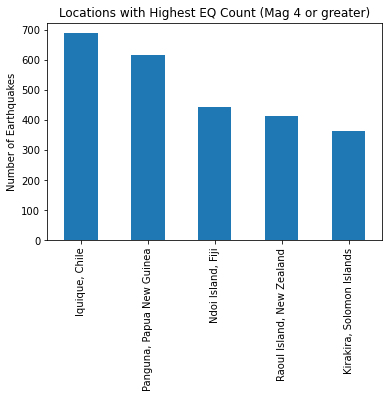

In [12]:
eqcountries = eqbig['country'].value_counts()
eqcountries.nlargest(5).plot(kind='bar')
plt.ylabel('Number of Earthquakes')
plt.title('Locations with Highest EQ Count (Mag 4 or greater)')

### 9) Make a histogram the distribution of the Earthquake magnitudes

https://pandas.pydata.org/pandas-docs/version/0.23/generated/pandas.DataFrame.hist.html
https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html

Do one subplot for the filtered and one for the unfiltered dataset.
Use a Logarithmic scale. What sort of relationship do you see?

Text(0, 0.5, 'Number of EQs')

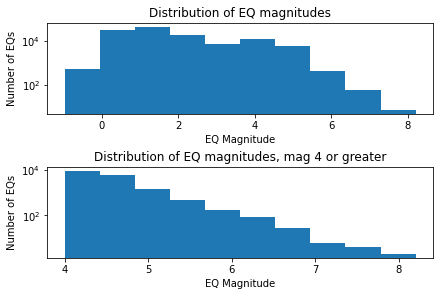

In [13]:
fig, axes = plt.subplots(2,1, constrained_layout=True)
plt.subplot(211)
plt.hist(data['mag'], log=True)
plt.title('Distribution of EQ magnitudes')
plt.xlabel('EQ Magnitude')
plt.ylabel('Number of EQs')
plt.subplot(212)
plt.hist(eqbig['mag'], log=True) 
plt.title('Distribution of EQ magnitudes, mag 4 or greater')
plt.xlabel('EQ Magnitude')
plt.ylabel('Number of EQs')

### 11) Visualize the locations of earthquakes by making a scatterplot of their latitude and longitude

Use a two-column subplot with both the filtered and unfiltered datasets. Color the points by magnitude. Make it pretty

What difference do you note between the filtered and unfiltered datasets?

Text(0, 0.5, 'Latitude (deg)')

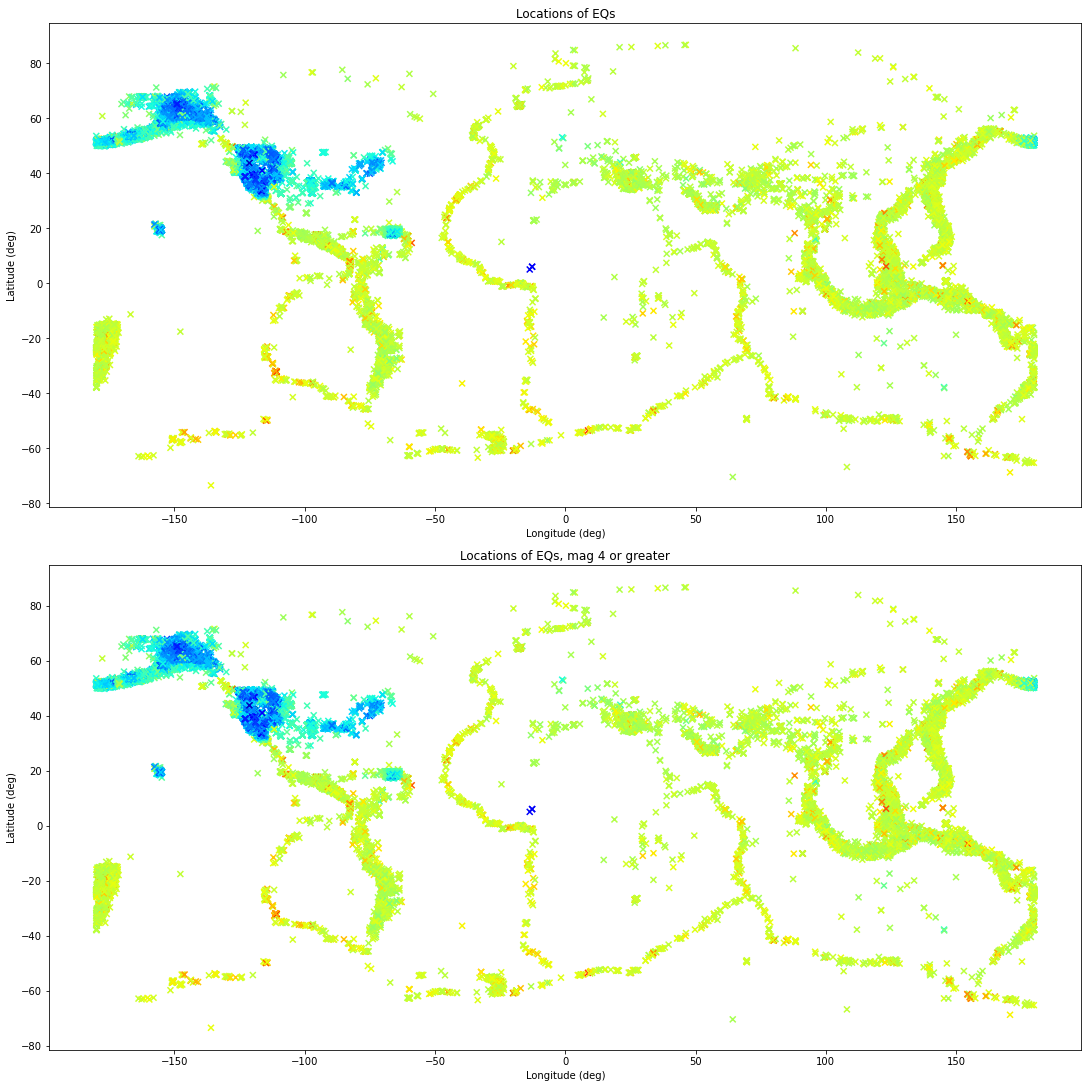

In [14]:
fig, ax = plt.subplots(2,1, constrained_layout=True, figsize=(15,15))
norm=colors.LogNorm(vmin=data['mag'].min(), vmax=data['mag'].max())
plt.subplot(211)
plt.scatter(data['longitude'], data['latitude'], marker='x', c=data['mag'], cmap='jet')
plt.title('Locations of EQs')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')
plt.subplot(212)
plt.scatter(data['longitude'], data['latitude'], marker='x', c=data['mag'], cmap='jet')
plt.title('Locations of EQs, mag 4 or greater')
plt.xlabel('Longitude (deg)')
plt.ylabel('Latitude (deg)')